## DATA SCIENCE PROJECT

### Utkarsh Dabholkar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
project_df = pd.read_csv("diabetic_data_train.csv")
test_df = pd.read_csv("diabetic_data_test.csv")

## 1. Exploring and sanitizing the data

### Basic Exploration

In [3]:
project_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,93634,27698,17488,96510,35774,74984,76129,50738,6348,16967
encounter_id,338369606,90739116,64286964,376610012,110557278,224162346,229518798,152125260,31596888,63003072
patient_nbr,159605546,83232054,95117913,136697972,2851308,109195155,41356647,24827607,2942856,13168413
race,AfricanAmerican,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Male,Female,Male,Male,Male,Male,Female,Male,Male,Male
age,[70-80),[70-80),[60-70),[40-50),[80-90),[80-90),[60-70),[60-70),[40-50),[80-90)
weight,?,[75-100),?,?,?,?,?,?,?,?
admission_type_id,1,3,3,3,1,1,3,3,3,1
discharge_disposition_id,23,1,1,1,1,6,1,1,1,18
admission_source_id,7,1,1,1,6,7,1,1,1,7


In [4]:
project_df['age']

0        [70-80)
1        [70-80)
2        [60-70)
3        [40-50)
4        [80-90)
          ...   
76319    [70-80)
76320    [80-90)
76321    [80-90)
76322    [40-50)
76323    [60-70)
Name: age, Length: 76324, dtype: object

In [5]:
project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76324 entries, 0 to 76323
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                76324 non-null  int64 
 1   encounter_id              76324 non-null  int64 
 2   patient_nbr               76324 non-null  int64 
 3   race                      76324 non-null  object
 4   gender                    76324 non-null  object
 5   age                       76324 non-null  object
 6   weight                    76324 non-null  object
 7   admission_type_id         76324 non-null  int64 
 8   discharge_disposition_id  76324 non-null  int64 
 9   admission_source_id       76324 non-null  int64 
 10  time_in_hospital          76324 non-null  int64 
 11  payer_code                76324 non-null  object
 12  medical_specialty         76324 non-null  object
 13  num_lab_procedures        76324 non-null  int64 
 14  num_procedures        

In [6]:
project_df.isnull().sum()

Unnamed: 0                  0
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamid

In [7]:
project_df.isnull().sum()

Unnamed: 0                  0
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamid

In [8]:
project_df.shape

(76324, 51)

In [9]:
test_df.shape

(25442, 51)

In [10]:
for column in project_df.columns:
    if project_df[column].dtype == object:
         print(column,project_df[column][project_df[column] == '?'].count())

race 1708
gender 0
age 0
weight 73935
payer_code 30048
medical_specialty 37482
diag_1 20
diag_2 276
diag_3 1081
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [11]:
for col in test_df.columns:
    if test_df[col].dtype == object:
         print(col,test_df[col][test_df[col] == '?'].count())

race 565
gender 0
age 0
weight 24634
payer_code 10208
medical_specialty 12467
diag_1 1
diag_2 82
diag_3 342
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [12]:
print('gender',project_df['gender'][project_df['gender'] == 'Unknown/Invalid'].count())

gender 3


In [13]:
print('gender',test_df['gender'][test_df['gender'] == 'Unknown/Invalid'].count())

gender 0


With the basic exploration done we will now proceed to drop the missing values for gender, diag_1, diag_2, diag_3 beacause they have very few missing values. we will drop weight with 97% missing values and payer_code, medical_specialty  with almost more than 50% missing values.

In [14]:
train_df = project_df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [15]:
x = project_df[project_df['diag_1'] == '?'].index.values

In [16]:
train_df = train_df.drop(x)

In [17]:
x2 = train_df[train_df['diag_2'] == '?'].index.values

In [18]:
train_df = train_df.drop(x2)

In [19]:
x3 = train_df[train_df['diag_3'] == '?'].index.values

In [20]:
train_df = train_df.drop(x3)

In [21]:
x4 = train_df[train_df['gender'] == 'Unknown/Invalid'].index.values

In [22]:
train_df = train_df.drop(x4)

In [23]:
x5 = train_df[train_df['race'] == '?'].index.values

In [24]:
train_df = train_df.drop(x5)

Droping discharge_disposition_id = 11 because the paitent is expired and cannot be readmitted.

In [25]:
x6 = train_df[train_df['discharge_disposition_id'] == 11].index.values

In [26]:
train_df = train_df.drop(x6)

In [27]:
Ntest_df = test_df.drop(['weight','payer_code','medical_specialty'], axis = 1)

In [28]:
y = Ntest_df[Ntest_df['diag_1'] == '?'].index.values
Ntest_df = Ntest_df.drop(y)

In [29]:
y1 = Ntest_df[Ntest_df['diag_2'] == '?'].index.values
Ntest_df = Ntest_df.drop(y1)

In [30]:
y2 = Ntest_df[Ntest_df['diag_3'] == '?'].index.values
Ntest_df = Ntest_df.drop(y2)

In [31]:
y3 = Ntest_df[Ntest_df['gender'] == 'Unknown/Invalid'].index.values
Ntest_df = Ntest_df.drop(y3)

In [32]:
y4 = Ntest_df[Ntest_df['race'] == '?'].index.values
Ntest_df = Ntest_df.drop(y4)

In [33]:
y5 = Ntest_df[Ntest_df['discharge_disposition_id'] == 11].index.values
Ntest_df = Ntest_df.drop(y5)

For all the medicine we can put 1 for any kind of change and 0 for no change

In [34]:
meds = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
        'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 
        'acetohexamide']

In [35]:
for med in meds:
    train_df[med] = train_df[med].replace('No', 0)
    train_df[med] = train_df[med].replace('Steady', 0)
    train_df[med] = train_df[med].replace('Up', 1)
    train_df[med] = train_df[med].replace('Down', 1)

In [36]:
for med in meds:
    Ntest_df[med] = Ntest_df[med].replace('No', 0)
    Ntest_df[med] = Ntest_df[med].replace('Steady', 0)
    Ntest_df[med] = Ntest_df[med].replace('Up', 1)
    Ntest_df[med] = Ntest_df[med].replace('Down', 1)

Encoding values 

In [37]:
train_df['change'] = train_df['change'].replace('Ch', 1)
train_df['change'] = train_df['change'].replace('No', 0)

In [38]:
Ntest_df['change'] = Ntest_df['change'].replace('Ch', 1)
Ntest_df['change'] = Ntest_df['change'].replace('No', 0)

In [39]:
train_df['gender'] = train_df['gender'].replace('Male', 1)
train_df['gender'] = train_df['gender'].replace('Female', 0)

In [40]:
Ntest_df['gender'] = Ntest_df['gender'].replace('Male', 1)
Ntest_df['gender'] = Ntest_df['gender'].replace('Female', 0)

In [41]:
train_df['diabetesMed'] = train_df['diabetesMed'].replace('Yes', 1)
train_df['diabetesMed'] = train_df['diabetesMed'].replace('No', 0)

In [42]:
Ntest_df['diabetesMed'] = Ntest_df['diabetesMed'].replace('Yes', 1)
Ntest_df['diabetesMed'] = Ntest_df['diabetesMed'].replace('No', 0)

Clubing similar columns to simplify it

In [43]:
train_df['admission_type_id'] = train_df['admission_type_id'].replace(2, 1)
train_df['admission_type_id'] = train_df['admission_type_id'].replace(7, 1)
train_df['admission_type_id'] = train_df['admission_type_id'].replace(6, 5)
train_df['admission_type_id'] = train_df['admission_type_id'].replace(8, 5)

In [44]:
Ntest_df['admission_type_id'] = Ntest_df['admission_type_id'].replace(2, 1)
Ntest_df['admission_type_id'] = Ntest_df['admission_type_id'].replace(7, 1)
Ntest_df['admission_type_id'] = Ntest_df['admission_type_id'].replace(6, 5)
Ntest_df['admission_type_id'] = Ntest_df['admission_type_id'].replace(8, 5)

In [45]:
train_df['discharge_disposition_id'] = train_df['discharge_disposition_id'].replace(6,1)
train_df['discharge_disposition_id'] = train_df['discharge_disposition_id'].replace(8,1)
train_df['discharge_disposition_id'] = train_df['discharge_disposition_id'].replace(9,1)
train_df['discharge_disposition_id'] = train_df['discharge_disposition_id'].replace(13,1)
train_df['discharge_disposition_id'] = train_df['discharge_disposition_id'].replace(3,2)
train_df['discharge_disposition_id'] = train_df['discharge_disposition_id'].replace(4,2)
train_df['discharge_disposition_id'] = train_df['discharge_disposition_id'].replace(5,2)
train_df['discharge_disposition_id'] = train_df['discharge_disposition_id'].replace(14,2)
train_df['discharge_disposition_id'] = train_df['discharge_disposition_id'].replace(22,2)
train_df['discharge_disposition_id'] = train_df['discharge_disposition_id'].replace(23,2)
train_df['discharge_disposition_id'] = train_df['discharge_disposition_id'].replace(24,2)
train_df['discharge_disposition_id'] = train_df['discharge_disposition_id'].replace(12,10)
train_df['discharge_disposition_id'] = train_df['discharge_disposition_id'].replace(15,10)
train_df['discharge_disposition_id'] = train_df['discharge_disposition_id'].replace(16,10)
train_df['discharge_disposition_id'] = train_df['discharge_disposition_id'].replace(17,10)
train_df['discharge_disposition_id'] = train_df['discharge_disposition_id'].replace(25,18)
train_df['discharge_disposition_id'] = train_df['discharge_disposition_id'].replace(26,18)

In [46]:
Ntest_df['discharge_disposition_id'] = Ntest_df['discharge_disposition_id'].replace(6,1)
Ntest_df['discharge_disposition_id'] = Ntest_df['discharge_disposition_id'].replace(8,1)
Ntest_df['discharge_disposition_id'] = Ntest_df['discharge_disposition_id'].replace(9,1)
Ntest_df['discharge_disposition_id'] = Ntest_df['discharge_disposition_id'].replace(13,1)
Ntest_df['discharge_disposition_id'] = Ntest_df['discharge_disposition_id'].replace(3,2)
Ntest_df['discharge_disposition_id'] = Ntest_df['discharge_disposition_id'].replace(4,2)
Ntest_df['discharge_disposition_id'] = Ntest_df['discharge_disposition_id'].replace(5,2)
Ntest_df['discharge_disposition_id'] = Ntest_df['discharge_disposition_id'].replace(14,2)
Ntest_df['discharge_disposition_id'] = Ntest_df['discharge_disposition_id'].replace(22,2)
Ntest_df['discharge_disposition_id'] = Ntest_df['discharge_disposition_id'].replace(23,2)
Ntest_df['discharge_disposition_id'] = Ntest_df['discharge_disposition_id'].replace(24,2)
Ntest_df['discharge_disposition_id'] = Ntest_df['discharge_disposition_id'].replace(12,10)
Ntest_df['discharge_disposition_id'] = Ntest_df['discharge_disposition_id'].replace(15,10)
Ntest_df['discharge_disposition_id'] = Ntest_df['discharge_disposition_id'].replace(16,10)
Ntest_df['discharge_disposition_id'] = Ntest_df['discharge_disposition_id'].replace(17,10)
Ntest_df['discharge_disposition_id'] = Ntest_df['discharge_disposition_id'].replace(25,18)
Ntest_df['discharge_disposition_id'] = Ntest_df['discharge_disposition_id'].replace(26,18)

In [47]:
train_df['admission_source_id'] = train_df['admission_source_id'].replace(2,1)
train_df['admission_source_id'] = train_df['admission_source_id'].replace(3,1)
train_df['admission_source_id'] = train_df['admission_source_id'].replace(5,4)
train_df['admission_source_id'] = train_df['admission_source_id'].replace(6,4)
train_df['admission_source_id'] = train_df['admission_source_id'].replace(10,4)
train_df['admission_source_id'] = train_df['admission_source_id'].replace(22,4)
train_df['admission_source_id'] = train_df['admission_source_id'].replace(25,4)
train_df['admission_source_id'] = train_df['admission_source_id'].replace(15,9)
train_df['admission_source_id'] = train_df['admission_source_id'].replace(17,9)
train_df['admission_source_id'] = train_df['admission_source_id'].replace(20,9)
train_df['admission_source_id'] = train_df['admission_source_id'].replace(21,9)
train_df['admission_source_id'] = train_df['admission_source_id'].replace(13,11)
train_df['admission_source_id'] = train_df['admission_source_id'].replace(14,11)

In [48]:
Ntest_df['admission_source_id'] = Ntest_df['admission_source_id'].replace(2,1)
Ntest_df['admission_source_id'] = Ntest_df['admission_source_id'].replace(3,1)
Ntest_df['admission_source_id'] = Ntest_df['admission_source_id'].replace(5,4)
Ntest_df['admission_source_id'] = Ntest_df['admission_source_id'].replace(6,4)
Ntest_df['admission_source_id'] = Ntest_df['admission_source_id'].replace(10,4)
Ntest_df['admission_source_id'] = Ntest_df['admission_source_id'].replace(22,4)
Ntest_df['admission_source_id'] = Ntest_df['admission_source_id'].replace(25,4)
Ntest_df['admission_source_id'] = Ntest_df['admission_source_id'].replace(15,9)
Ntest_df['admission_source_id'] = Ntest_df['admission_source_id'].replace(17,9)
Ntest_df['admission_source_id'] = Ntest_df['admission_source_id'].replace(20,9)
Ntest_df['admission_source_id'] = Ntest_df['admission_source_id'].replace(21,9)
Ntest_df['admission_source_id'] = Ntest_df['admission_source_id'].replace(13,11)
Ntest_df['admission_source_id'] = Ntest_df['admission_source_id'].replace(14,11)

In [49]:
train_df['A1Cresult'] = train_df['A1Cresult'].replace('>7', 2)
train_df['A1Cresult'] = train_df['A1Cresult'].replace('>8', 2)
train_df['A1Cresult'] = train_df['A1Cresult'].replace('Norm', 1)
train_df['A1Cresult'] = train_df['A1Cresult'].replace('None', 0)

In [50]:
Ntest_df['A1Cresult'] = Ntest_df['A1Cresult'].replace('>7', 2)
Ntest_df['A1Cresult'] = Ntest_df['A1Cresult'].replace('>8', 2)
Ntest_df['A1Cresult'] = Ntest_df['A1Cresult'].replace('Norm', 1)
Ntest_df['A1Cresult'] = Ntest_df['A1Cresult'].replace('None', 0)

In [51]:
train_df['max_glu_serum'] = train_df['max_glu_serum'].replace('>200', 2)
train_df['max_glu_serum'] = train_df['max_glu_serum'].replace('>300', 2)
train_df['max_glu_serum'] = train_df['max_glu_serum'].replace('Norm', 1)
train_df['max_glu_serum'] = train_df['max_glu_serum'].replace('None', 0)

In [52]:
Ntest_df['max_glu_serum'] = Ntest_df['max_glu_serum'].replace('>200', 2)
Ntest_df['max_glu_serum'] = Ntest_df['max_glu_serum'].replace('>300', 2)
Ntest_df['max_glu_serum'] = Ntest_df['max_glu_serum'].replace('Norm', 1)
Ntest_df['max_glu_serum'] = Ntest_df['max_glu_serum'].replace('None', 0)

Since we have ranges in age [0-10] converting it into the mid point 5 for 0-10.

In [53]:
for i in range(0,10):
    train_df['age'] = train_df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', 5+(i*10))

In [54]:
for i in range(0,10):
    Ntest_df['age'] = Ntest_df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', 5+(i*10))

For the Diagnosis we will convert the str values like v and e to 0 or others and map all other values to 9 categories which are
Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others.

In [55]:
train_df['level1_diag1'] = train_df['diag_1']
train_df['level1_diag2'] = train_df['diag_2']
train_df['level1_diag3'] = train_df['diag_3']

In [56]:
train_df.loc[train_df['diag_1'].str.contains('V'), ['level1_diag1']] = 0
train_df.loc[train_df['diag_1'].str.contains('E'), ['level1_diag1']] = 0
train_df.loc[train_df['diag_2'].str.contains('V'), ['level1_diag2']] = 0
train_df.loc[train_df['diag_2'].str.contains('E'), ['level1_diag2']] = 0
train_df.loc[train_df['diag_3'].str.contains('V'), ['level1_diag3']] = 0
train_df.loc[train_df['diag_3'].str.contains('E'), ['level1_diag3']] = 0

In [57]:
train_df['level1_diag1'] = train_df['level1_diag1'].astype(float)
train_df['level1_diag2'] = train_df['level1_diag2'].astype(float)
train_df['level1_diag3'] = train_df['level1_diag3'].astype(float)

In [58]:
for index, row in train_df.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        train_df.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        train_df.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        train_df.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        train_df.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        train_df.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        train_df.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        train_df.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        train_df.loc[index, 'level1_diag1'] = 8
    else:
        train_df.loc[index, 'level1_diag1'] = 0
        
    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        train_df.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        train_df.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        train_df.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        train_df.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        train_df.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        train_df.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        train_df.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        train_df.loc[index, 'level1_diag2'] = 8
    else:
        train_df.loc[index, 'level1_diag2'] = 0
    
    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        train_df.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        train_df.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        train_df.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        train_df.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        train_df.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        train_df.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        train_df.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        train_df.loc[index, 'level1_diag3'] = 8
    else:
        train_df.loc[index, 'level1_diag3'] = 0

In [59]:
train_df = train_df.drop(['diag_1','diag_2','diag_3'], axis = 1)

In [60]:
train_df['level1_diag1'] = train_df['level1_diag1'].astype(int)
train_df['level1_diag2'] = train_df['level1_diag2'].astype(int)
train_df['level1_diag3'] = train_df['level1_diag3'].astype(int)

In [61]:
Ntest_df['level1_diag1'] = Ntest_df['diag_1']
Ntest_df['level1_diag2'] = Ntest_df['diag_2']
Ntest_df['level1_diag3'] = Ntest_df['diag_3']

In [62]:
Ntest_df.loc[Ntest_df['diag_1'].str.contains('V'), ['level1_diag1']] = 0
Ntest_df.loc[Ntest_df['diag_1'].str.contains('E'), ['level1_diag1']] = 0
Ntest_df.loc[Ntest_df['diag_2'].str.contains('V'), ['level1_diag2']] = 0
Ntest_df.loc[Ntest_df['diag_2'].str.contains('E'), ['level1_diag2']] = 0
Ntest_df.loc[Ntest_df['diag_3'].str.contains('V'), ['level1_diag3']] = 0
Ntest_df.loc[Ntest_df['diag_3'].str.contains('E'), ['level1_diag3']] = 0

In [63]:
Ntest_df['level1_diag1'] = Ntest_df['level1_diag1'].astype(float)
Ntest_df['level1_diag2'] = Ntest_df['level1_diag2'].astype(float)
Ntest_df['level1_diag3'] = Ntest_df['level1_diag3'].astype(float)

In [64]:
for index, row in Ntest_df.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        Ntest_df.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        Ntest_df.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        Ntest_df.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        Ntest_df.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        Ntest_df.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        Ntest_df.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        Ntest_df.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        Ntest_df.loc[index, 'level1_diag1'] = 8
    else:
        Ntest_df.loc[index, 'level1_diag1'] = 0
        
    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        Ntest_df.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        Ntest_df.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        Ntest_df.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        Ntest_df.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        Ntest_df.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        Ntest_df.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        Ntest_df.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        Ntest_df.loc[index, 'level1_diag2'] = 8
    else:
        Ntest_df.loc[index, 'level1_diag2'] = 0
    
    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        Ntest_df.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        Ntest_df.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        Ntest_df.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        Ntest_df.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        Ntest_df.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        Ntest_df.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        Ntest_df.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        Ntest_df.loc[index, 'level1_diag3'] = 8
    else:
        Ntest_df.loc[index, 'level1_diag3'] = 0

In [65]:
Ntest_df = Ntest_df.drop(['diag_1','diag_2','diag_3'], axis = 1)

In [66]:
Ntest_df['level1_diag1'] = Ntest_df['level1_diag1'].astype(int)
Ntest_df['level1_diag2'] = Ntest_df['level1_diag2'].astype(int)
Ntest_df['level1_diag3'] = Ntest_df['level1_diag3'].astype(int)

In [67]:
train_df.head().T

,1,2,3,4,5
Unnamed: 0,27698,17488,96510,35774,74984
encounter_id,90739116,64286964,376610012,110557278,224162346
patient_nbr,83232054,95117913,136697972,2851308,109195155
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,0,1,1,1,1
age,75,65,45,85,85
admission_type_id,3,3,3,1,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,1,1,1,4,7
time_in_hospital,1,4,2,1,2


Encoding The race using LabelEncoder.

In [68]:
from sklearn.preprocessing import LabelEncoder
race_encoder = LabelEncoder()
train_df['race'] = race_encoder.fit_transform(train_df['race'])

In [69]:
from sklearn.preprocessing import LabelEncoder
race_encoder = LabelEncoder()
Ntest_df['race'] = race_encoder.fit_transform(Ntest_df['race'])

Encoding our Target value as 1 and 0 for everything else

In [70]:
train_df['readmitted'] = train_df['readmitted'].replace('>30', 0)
train_df['readmitted'] = train_df['readmitted'].replace('<30', 1)
train_df['readmitted'] = train_df['readmitted'].replace('NO', 0)

In [71]:
Ntest_df['readmitted'] = Ntest_df['readmitted'].replace('>30', 0)
Ntest_df['readmitted'] = Ntest_df['readmitted'].replace('<30', 1)
Ntest_df['readmitted'] = Ntest_df['readmitted'].replace('NO', 0)

<IPython.core.display.Javascript object>


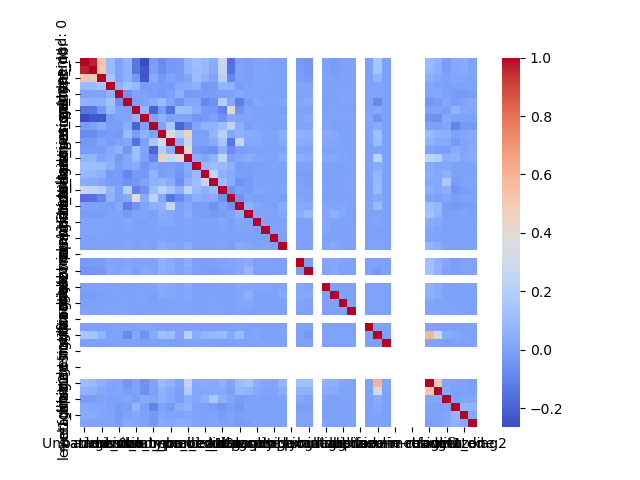

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,level1_diag1,level1_diag2,level1_diag3
Unnamed: 0,1.000000,0.967192,0.529580,0.092970,0.002585,0.066976,-0.145618,-0.264741,-0.021288,-0.073219,...,NaN,NaN,NaN,NaN,0.107838,0.059697,-0.014304,0.028687,0.032933,0.005971
encounter_id,0.967192,1.000000,0.512719,0.097182,0.003597,0.062249,-0.140244,-0.230115,-0.007152,-0.068543,...,NaN,NaN,NaN,NaN,0.093123,0.052848,-0.014322,0.024416,0.039533,0.004006
patient_nbr,0.529580,0.512719,1.000000,0.149872,0.005951,0.063089,-0.034341,-0.233905,0.034228,-0.029103,...,NaN,NaN,NaN,NaN,0.053642,0.022136,0.002586,0.018799,0.012875,0.004093
race,0.092970,0.097182,0.149872,1.000000,0.065705,0.132552,0.090396,-0.020367,-0.009730,-0.017973,...,NaN,NaN,NaN,NaN,0.015965,0.004873,-0.006307,-0.000181,0.009430,0.002840
gender,0.002585,0.003597,0.005951,0.065705,1.000000,-0.055162,0.011308,0.001034,-0.011002,-0.030668,...,NaN,NaN,NaN,NaN,0.016571,0.016302,-0.001933,-0.019950,-0.022925,-0.013007
age,0.066976,0.062249,0.063089,0.132552,-0.055162,1.000000,-0.005143,0.011060,0.038705,0.097014,...,NaN,NaN,NaN,NaN,-0.040092,-0.019997,0.013965,-0.011891,0.005697,0.031539
admission_type_id,-0.145618,-0.140244,-0.034341,0.090396,0.011308,-0.005143,1.000000,0.074300,-0.191526,-0.019967,...,NaN,NaN,NaN,NaN,0.010785,0.002798,-0.011492,0.066547,0.023414,0.017633
discharge_disposition_id,-0.264741,-0.230115,-0.233905,-0.020367,0.001034,0.011060,0.074300,1.000000,-0.001826,0.064855,...,NaN,NaN,NaN,NaN,-0.056325,-0.059583,0.027364,-0.007706,-0.002936,-0.000581
admission_source_id,-0.021288,-0.007152,0.034228,-0.009730,-0.011002,0.038705,-0.191526,-0.001826,1.000000,-0.000534,...,NaN,NaN,NaN,NaN,0.003883,-0.003075,0.014574,-0.101241,-0.030219,-0.029952
time_in_hospital,-0.073219,-0.068543,-0.029103,-0.017973,-0.030668,0.097014,-0.019967,0.064855,-0.000534,1.000000,...,NaN,NaN,NaN,NaN,0.104545,0.060308,0.047270,0.006971,0.015994,0.032553


In [72]:
%matplotlib notebook
corr = train_df.corr()
sns.heatmap(corr, cmap = 'coolwarm')
corr

In [73]:
train_df = train_df.drop(['glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','troglitazone','tolbutamide','acetohexamide'], axis = 1)

In [74]:
Ntest_df = Ntest_df.drop(['glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','troglitazone','tolbutamide','acetohexamide'], axis = 1)

<IPython.core.display.Javascript object>


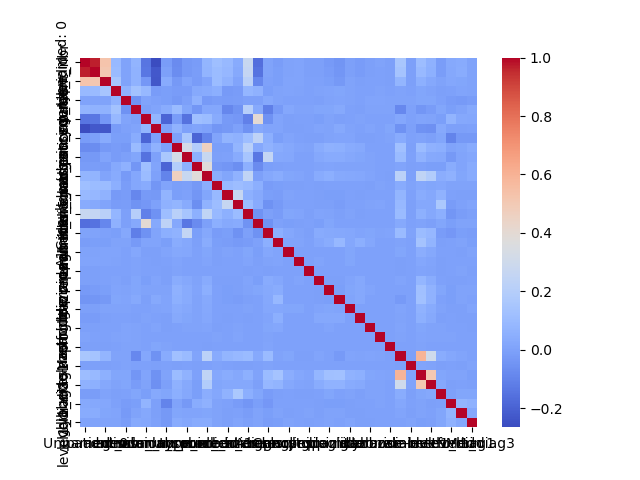

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,miglitol,tolazamide,insulin,glyburide-metformin,change,diabetesMed,readmitted,level1_diag1,level1_diag2,level1_diag3
Unnamed: 0,1.000000,0.967192,0.529580,0.092970,0.002585,0.066976,-0.145618,-0.264741,-0.021288,-0.073219,...,0.002523,-0.005219,0.154364,-0.003204,0.107838,0.059697,-0.014304,0.028687,0.032933,0.005971
encounter_id,0.967192,1.000000,0.512719,0.097182,0.003597,0.062249,-0.140244,-0.230115,-0.007152,-0.068543,...,0.001293,-0.004463,0.136727,-0.004060,0.093123,0.052848,-0.014322,0.024416,0.039533,0.004006
patient_nbr,0.529580,0.512719,1.000000,0.149872,0.005951,0.063089,-0.034341,-0.233905,0.034228,-0.029103,...,-0.000037,-0.004950,0.073495,-0.003458,0.053642,0.022136,0.002586,0.018799,0.012875,0.004093
race,0.092970,0.097182,0.149872,1.000000,0.065705,0.132552,0.090396,-0.020367,-0.009730,-0.017973,...,0.002949,0.001475,0.003829,0.001130,0.015965,0.004873,-0.006307,-0.000181,0.009430,0.002840
gender,0.002585,0.003597,0.005951,0.065705,1.000000,-0.055162,0.011308,0.001034,-0.011002,-0.030668,...,0.008043,0.004022,0.004119,0.003464,0.016571,0.016302,-0.001933,-0.019950,-0.022925,-0.013007
age,0.066976,0.062249,0.063089,0.132552,-0.055162,1.000000,-0.005143,0.011060,0.038705,0.097014,...,0.006622,0.002120,-0.086791,-0.002427,-0.040092,-0.019997,0.013965,-0.011891,0.005697,0.031539
admission_type_id,-0.145618,-0.140244,-0.034341,0.090396,0.011308,-0.005143,1.000000,0.074300,-0.191526,-0.019967,...,-0.001589,-0.002191,0.018812,-0.000272,0.010785,0.002798,-0.011492,0.066547,0.023414,0.017633
discharge_disposition_id,-0.264741,-0.230115,-0.233905,-0.020367,0.001034,0.011060,0.074300,1.000000,-0.001826,0.064855,...,-0.001197,0.015713,-0.056382,-0.003090,-0.056325,-0.059583,0.027364,-0.007706,-0.002936,-0.000581
admission_source_id,-0.021288,-0.007152,0.034228,-0.009730,-0.011002,0.038705,-0.191526,-0.001826,1.000000,-0.000534,...,0.000923,0.002401,0.034625,-0.001436,0.003883,-0.003075,0.014574,-0.101241,-0.030219,-0.029952
time_in_hospital,-0.073219,-0.068543,-0.029103,-0.017973,-0.030668,0.097014,-0.019967,0.064855,-0.000534,1.000000,...,-0.002297,-0.001772,0.125205,-0.003689,0.104545,0.060308,0.047270,0.006971,0.015994,0.032553


In [75]:
%matplotlib notebook
corr = train_df.corr()
sns.heatmap(corr, cmap = 'coolwarm')
corr

In [76]:
train_df = train_df.drop(['citoglipton','examide'], axis = 1)

In [77]:
Ntest_df = Ntest_df.drop(['citoglipton','examide'], axis = 1)

In [78]:
train_df.head(10).T

,1,2,3,4,5,6,7,8,9,10
Unnamed: 0,27698,17488,96510,35774,74984,76129,50738,6348,16967,58871
encounter_id,90739116,64286964,376610012,110557278,224162346,229518798,152125260,31596888,63003072,166274058
patient_nbr,83232054,95117913,136697972,2851308,109195155,41356647,24827607,2942856,13168413,84307662
race,2,2,0,2,2,2,0,2,2,2
gender,0,1,1,1,1,0,1,1,1,0
age,75,65,45,85,85,65,65,45,85,85
admission_type_id,3,3,3,1,1,3,3,3,1,1
discharge_disposition_id,1,1,1,1,1,1,1,1,18,1
admission_source_id,1,1,1,4,7,1,1,1,7,7
time_in_hospital,1,4,2,1,2,2,1,10,5,2


In [79]:
train_df.dtypes

Unnamed: 0                  int64
encounter_id                int64
patient_nbr                 int64
race                        int32
gender                      int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
glipizide                   int64
glyburide                   int64
pioglitazone                int64
rosiglitazone               int64
acarbose                    int64
miglitol      

## Data Visualization

Comparing various features with our target.

<IPython.core.display.Javascript object>


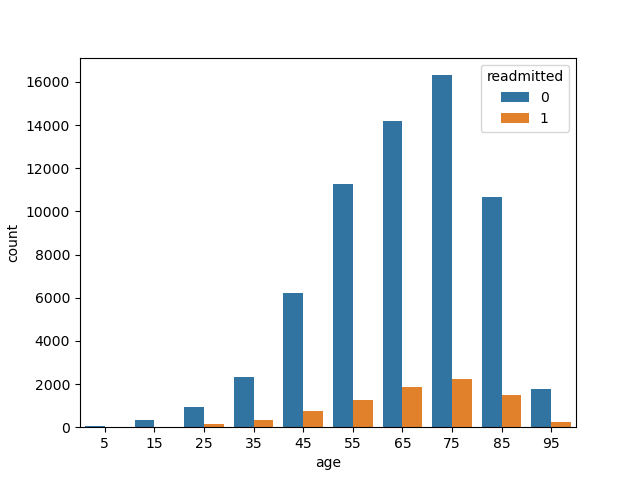

In [80]:
%matplotlib notebook
sns.countplot(x="age", hue="readmitted", data = train_df)
plt.show()

<IPython.core.display.Javascript object>


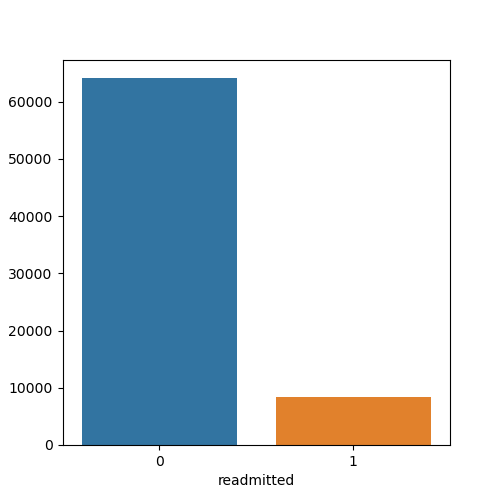

In [81]:
fig = plt.figure(figsize=(5,5))
fig = sns.countplot(x="readmitted", data = train_df)

<IPython.core.display.Javascript object>


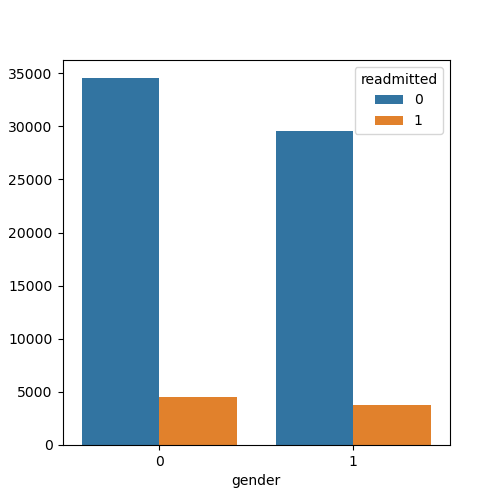

In [82]:
fig = plt.figure(figsize=(5,5))
fig = sns.countplot(x="gender",hue = "readmitted", data = train_df)

<IPython.core.display.Javascript object>


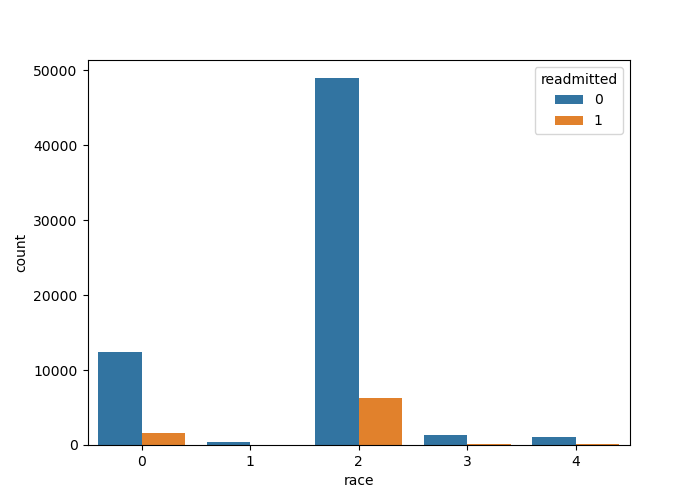

In [83]:
fig = plt.figure(figsize=(7,5))
fig = sns.countplot(x="race",hue = "readmitted", data = train_df)

<IPython.core.display.Javascript object>


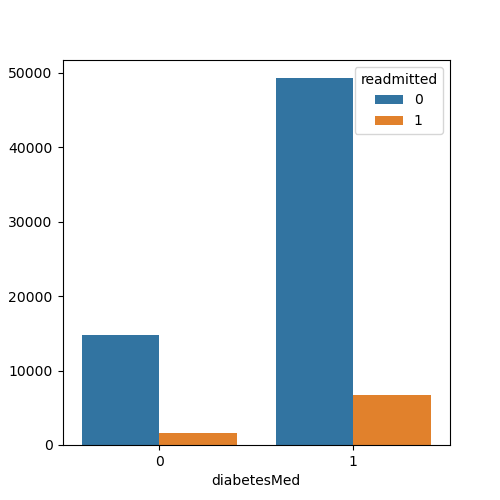

In [84]:
fig = plt.figure(figsize=(5,5))
fig = sns.countplot(x = "diabetesMed", hue = "readmitted", data = train_df)

<IPython.core.display.Javascript object>


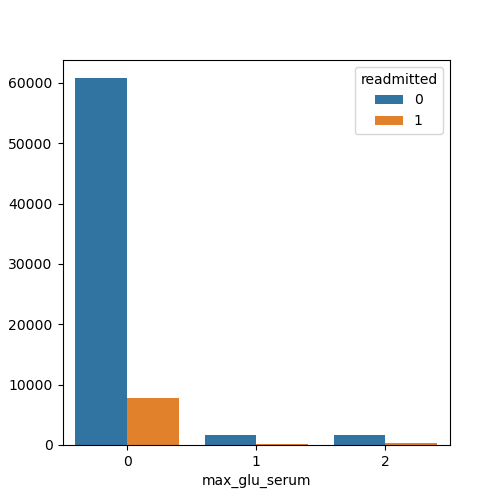

In [85]:
fig = plt.figure(figsize=(5,5))
fig = sns.countplot(x = "max_glu_serum", hue = "readmitted", data = train_df)

<IPython.core.display.Javascript object>


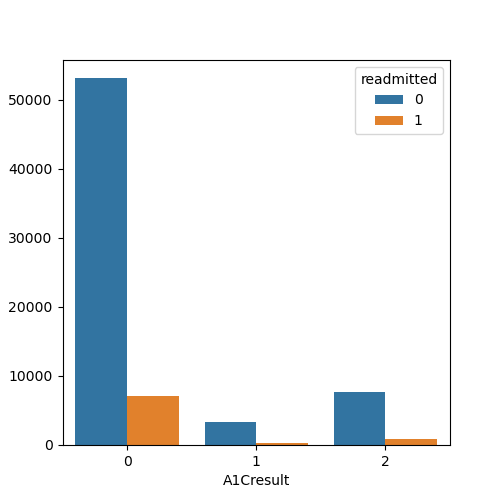

In [86]:
fig = plt.figure(figsize=(5,5))
fig = sns.countplot(x = "A1Cresult", hue = "readmitted", data = train_df)

<IPython.core.display.Javascript object>


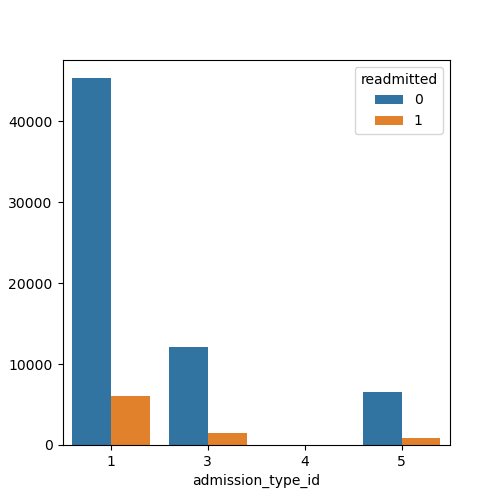

In [87]:
fig = plt.figure(figsize=(5,5))
fig = sns.countplot(x = "admission_type_id", hue = "readmitted", data = train_df)

<IPython.core.display.Javascript object>


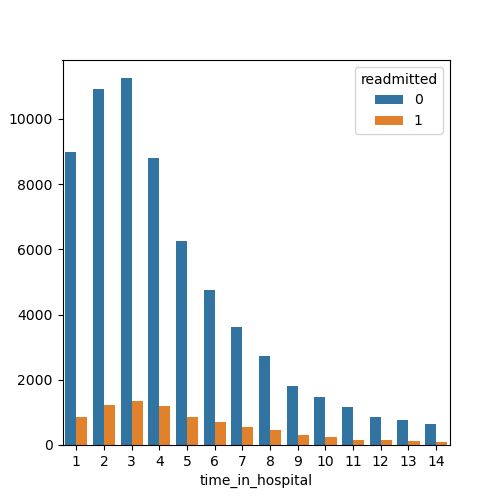

In [88]:
fig = plt.figure(figsize=(5,5))
fig = sns.countplot(x = "time_in_hospital", hue = "readmitted", data = train_df)

<IPython.core.display.Javascript object>


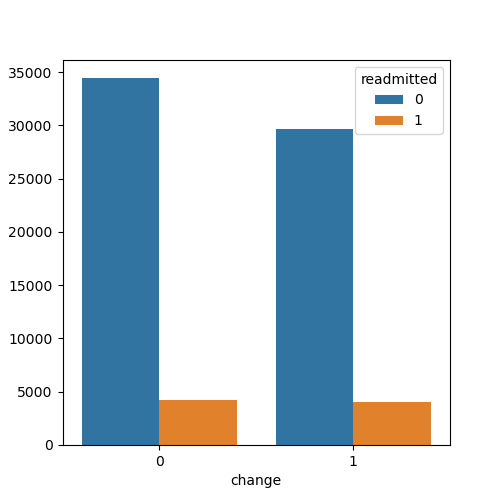

In [89]:
fig = plt.figure(figsize=(5,5))
fig = sns.countplot(x = "change", hue = "readmitted", data = train_df)

# Feature selection

We have removd all the features that are not important. so we will take the remaning features for our models.

In [90]:
train_df.keys()

Index(['Unnamed: 0', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'tolazamide', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed', 'readmitted',
       'level1_diag1', 'level1_diag2', 'level1_diag3'],
      dtype='object')

In [91]:
Y_train = train_df['readmitted']

In [92]:
X_train = train_df.drop(['readmitted'], axis = 1)

In [93]:
X_train.head(10).T

,1,2,3,4,5,6,7,8,9,10
Unnamed: 0,27698,17488,96510,35774,74984,76129,50738,6348,16967,58871
encounter_id,90739116,64286964,376610012,110557278,224162346,229518798,152125260,31596888,63003072,166274058
patient_nbr,83232054,95117913,136697972,2851308,109195155,41356647,24827607,2942856,13168413,84307662
race,2,2,0,2,2,2,0,2,2,2
gender,0,1,1,1,1,0,1,1,1,0
age,75,65,45,85,85,65,65,45,85,85
admission_type_id,3,3,3,1,1,3,3,3,1,1
discharge_disposition_id,1,1,1,1,1,1,1,1,18,1
admission_source_id,1,1,1,4,7,1,1,1,7,7
time_in_hospital,1,4,2,1,2,2,1,10,5,2


In [94]:
X_test = Ntest_df.drop(['readmitted'], axis = 1)

In [95]:
X_test.head(5).T

,0,1,2,3,4
Unnamed: 0,77011,95048,29619,85031,13003
encounter_id,233192070,356145692,96590916,268888392,52253142
patient_nbr,110179728,40743441,235017,70368660,19835496
race,2,2,0,2,0
gender,0,0,1,1,0
age,85,35,75,75,75
admission_type_id,1,1,1,3,3
discharge_disposition_id,2,1,1,1,18
admission_source_id,7,7,1,1,1
time_in_hospital,11,5,1,3,6


In [96]:
Y_test = Ntest_df['readmitted']

In [97]:
X_train.shape

(72348, 38)

In [98]:
y_train = Y_train

In [99]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [100]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=0)
train_input_new, train_output_new = sm.fit_sample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new.head().T

Original dataset shape Counter({0: 64047, 1: 8301})
New dataset shape Counter({0: 64047, 1: 64047})


,0,1,2,3,4
Unnamed: 0,27698,17488,96510,35774,74984
encounter_id,90739116,64286964,376610012,110557278,224162346
patient_nbr,83232054,95117913,136697972,2851308,109195155
race,2,2,0,2,2
gender,0,1,1,1,1
age,75,65,45,85,85
admission_type_id,3,3,3,1,1
discharge_disposition_id,1,1,1,1,1
admission_source_id,1,1,1,4,7
time_in_hospital,1,4,2,1,2


In [101]:
type(X_train.to_numpy().reshape(-1,1))

numpy.ndarray

# Building model

We will use LogisticRegression, DecisionTreeClassifier, RandomForestClassifier. 
We will start by using the model with normal data and use data trafomation on it and validate the model for overfitting using validation set.
We will upsample the target varible and also see how the accuracy changes.

### LogisticRegression (Without upsampling)

In [103]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
Nx_train = scalar.fit_transform(X_train)
NX_test = scalar.transform(X_test)

In [104]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(Nx_train, y_train)

LogisticRegression()

In [105]:
y_pred = Lr.predict(NX_test) 
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [106]:
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(y_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,20132,66,20198
1,2630,7,2637
All,22762,73,22835


In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, y_pred)))

Accuracy is 0.89


In [108]:
print("Precision is {0:.2f}".format(precision_score(Y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(Y_test, y_pred)))

Precision is 0.53
Recall is 0.01


In [109]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Lr, Nx_train, y_train, cv=7)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.88564241 0.88448142 0.88496517 0.88437349 0.88495404 0.88543783
 0.88437349]


In [110]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8843734881470731, 0.8848896939801053, 0.8856424148606811)

<IPython.core.display.Javascript object>


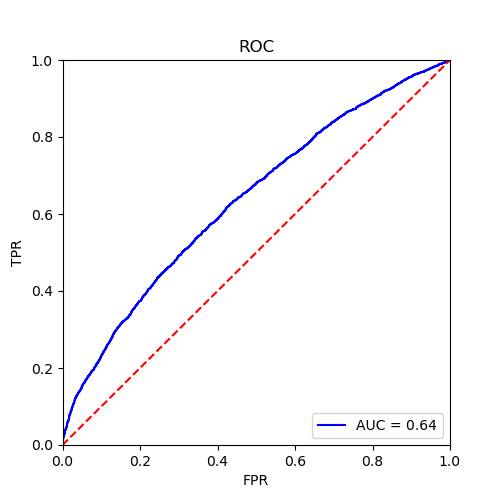

In [111]:
import matplotlib.pyplot as pltt
import sklearn.metrics as metrics

probs = Lr.predict_proba(NX_test)
predict = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, predict)
roc_auc = metrics.auc(fpr, tpr)

fig1 = plt.figure(figsize=(5,5))
fig1 = plt.title('ROC')
fig1 = plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
fig1 = plt.legend(loc = 'lower right')
fig1 = plt.plot([0, 1], [0, 1],'r--')
fig1 = plt.xlim([0, 1])
fig1 = plt.ylim([0, 1])
fig1 = plt.ylabel('TPR')
fig1 = plt.xlabel('FPR')

### Logistic Regression

In [112]:
X_train = train_df.drop(['readmitted'], axis = 1)
y_train = train_df['readmitted']
X_test = Ntest_df.drop(['readmitted'], axis = 1)
Y_test = Ntest_df['readmitted']

In [113]:
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=123)
train_input_new, train_output_new = sm.fit_sample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 64047, 1: 8301})
New dataset shape Counter({0: 64047, 1: 64047})


In [114]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
Nx_train = scalar.fit_transform(train_input_new)
NX_test = scalar.transform(X_test)

In [115]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Nx_train, train_output_new) 

LogisticRegression()

In [116]:
Lr_pred = model.predict(NX_test) 
Lr_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [117]:
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(Lr_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,12837,7361,20198
1,1660,977,2637
All,14497,8338,22835


In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, Lr_pred)))
print("Precision is {0:.2f}".format(precision_score(Y_test, Lr_pred)))
print("Recall is {0:.2f}".format(recall_score(Y_test, Lr_pred)))

Accuracy is 0.62
Precision is 0.13
Recall is 0.43


In [119]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, Nx_train, train_output_new, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.52435597 0.64566745 0.69141296 0.69570648 0.69482395 0.69302834
 0.68568975 0.68998361 0.69419939 0.69568272]


In [120]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.5243559718969555, 0.6710550617311488, 0.6957064793130366)

<IPython.core.display.Javascript object>


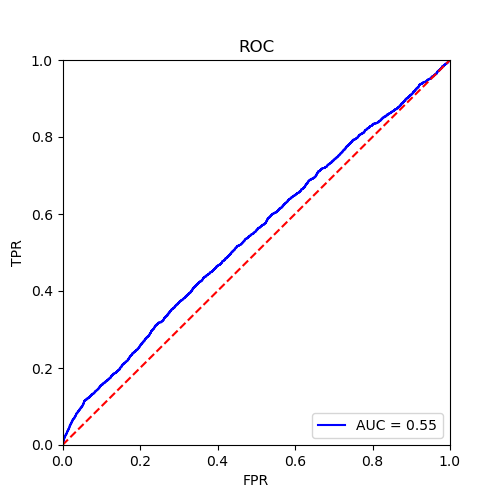

In [121]:
import matplotlib.pyplot as pltt
import sklearn.metrics as metrics

probs = model.predict_proba(NX_test)
predict = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, predict)
roc_auc = metrics.auc(fpr, tpr)

fig1 = plt.figure(figsize=(5,5))
fig1 = plt.title('ROC')
fig1 = plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
fig1 = plt.legend(loc = 'lower right')
fig1 = plt.plot([0, 1], [0, 1],'r--')
fig1 = plt.xlim([0, 1])
fig1 = plt.ylim([0, 1])
fig1 = plt.ylabel('TPR')
fig1 = plt.xlabel('FPR')

**Logistic Regression (Without up-sampling):** </br>
we can see that Accurcy 0.89, precision 0.53, Recall is 0.01,
After perfoming K fold validation(max: 0.884) we can note that this model is overfitting(0.89). 
**Model with up-sampling (Logistic Regression):**</br>
we can see that Accuracy 0.62, Precision is 0.13, Recall is 0.43,
After perfoming K fold validation(max: 0.69 and mean 0.67) we can note that this model fits perfectly.

**We choose the model with up sampling because the accuracy decreases but recall increases whereas the model without up-sampling overfits**

In [122]:
Acc_LR = 0.62
Pre_LR = 0.13
Rec_LR = 0.43

### Decision Tree Classifier (Without upsampling)

In [123]:
X_train = train_df.drop(['readmitted'], axis = 1)
X_test = Ntest_df.drop(['readmitted'], axis = 1)
Y_test = Ntest_df['readmitted']
y_train = Y_train

In [124]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
Nx_train = scalar.fit_transform(X_train)
NX_test = scalar.transform(X_test)

In [125]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(Nx_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [126]:
dtree_pred = dtree.predict(NX_test)
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,18184,2014,20198
1,2368,269,2637
All,20552,2283,22835


In [127]:
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(Y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(Y_test, dtree_pred)))

accuracy_dtree = accuracy_score(Y_test, dtree_pred)
precision_dtree = precision_score(Y_test, dtree_pred)
recall_dtree = recall_score(Y_test, dtree_pred)

Accuracy is 0.82
Precision is 0.19
Recall is 0.16


In [128]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtree, Nx_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.82059433 0.82363511 0.81644782 0.82170007 0.81354527 0.81630961
 0.81644782 0.81285418 0.81711363 0.81711363]


In [129]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8128541810642709, 0.8175761468868025, 0.8236351071181756)

               Feature  Importance
37        level1_diag3    0.039708
36        level1_diag2    0.044156
35        level1_diag1    0.045534
15    number_inpatient    0.048931
9     time_in_hospital    0.054910
1         encounter_id    0.082077
0           Unnamed: 0    0.083170
12     num_medications    0.086824
10  num_lab_procedures    0.103749
2          patient_nbr    0.161235


<IPython.core.display.Javascript object>


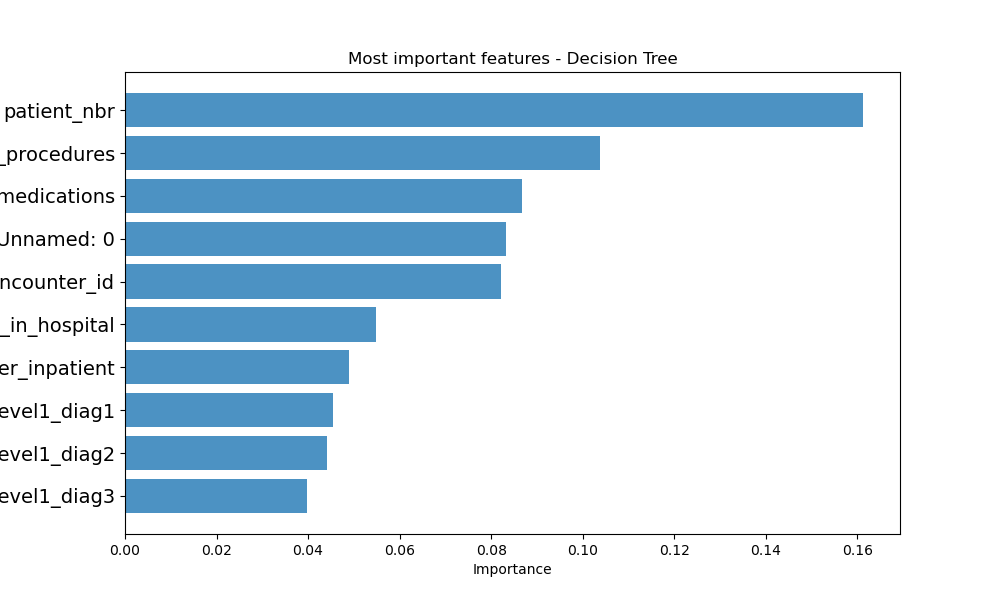

In [130]:
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

<IPython.core.display.Javascript object>


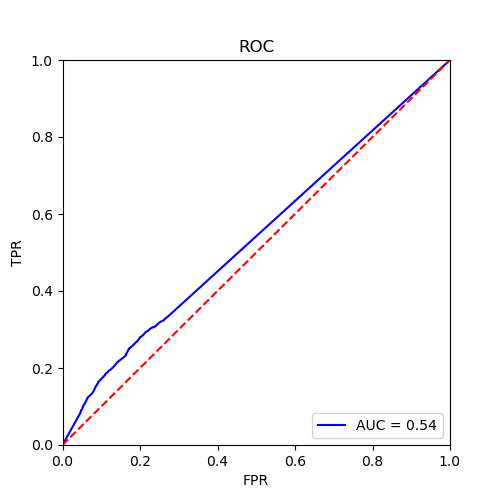

In [131]:
import matplotlib.pyplot as pltt
import sklearn.metrics as metrics

probs = dtree.predict_proba(NX_test)
predict = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, predict)
roc_auc = metrics.auc(fpr, tpr)

fig1 = plt.figure(figsize=(5,5))
fig1 = plt.title('ROC')
fig1 = plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
fig1 = plt.legend(loc = 'lower right')
fig1 = plt.plot([0, 1], [0, 1],'r--')
fig1 = plt.xlim([0, 1])
fig1 = plt.ylim([0, 1])
fig1 = plt.ylabel('TPR')
fig1 = plt.xlabel('FPR')

### Decision Tree Classifier

In [132]:
X_train = train_df.drop(['readmitted'], axis = 1)
X_test = Ntest_df.drop(['readmitted'], axis = 1)
Y_test = Ntest_df['readmitted']
y_train = Y_train

In [133]:
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=0)
train_input_new, train_output_new = sm.fit_sample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 64047, 1: 8301})
New dataset shape Counter({0: 64047, 1: 64047})


In [134]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
Nx_train = scalar.fit_transform(train_input_new)
NX_test = scalar.transform(X_test)

In [135]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(Nx_train, train_output_new)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [136]:
dtree_pred = dtree.predict(NX_test)
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,17011,3187,20198
1,2244,393,2637
All,19255,3580,22835


In [137]:
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, dtree_pred)))
print("Precision is {0:.2f}".format(precision_score(Y_test, dtree_pred)))
print("Recall is {0:.2f}".format(recall_score(Y_test, dtree_pred)))

accuracy_dtree = accuracy_score(Y_test, dtree_pred)
precision_dtree = precision_score(Y_test, dtree_pred)
recall_dtree = recall_score(Y_test, dtree_pred)

Accuracy is 0.78
Precision is 0.15
Recall is 0.20


In [138]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtree, Nx_train, train_output_new, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.56034348 0.79375488 0.88665105 0.88665105 0.88359747 0.88344133
 0.88523694 0.88164572 0.88765712 0.87875712]


In [139]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.5603434816549571, 0.8427736169843986, 0.887657116090249)

<IPython.core.display.Javascript object>


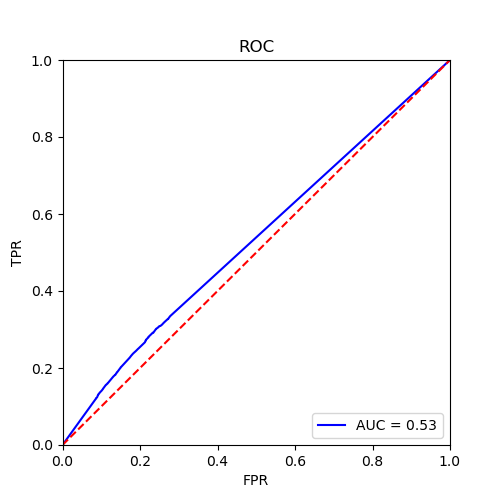

In [140]:
import matplotlib.pyplot as pltt
import sklearn.metrics as metrics

probs = dtree.predict_proba(NX_test)
predict = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, predict)
roc_auc = metrics.auc(fpr, tpr)

fig1 = plt.figure(figsize=(5,5))
fig1 = plt.title('ROC')
fig1 = plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
fig1 = plt.legend(loc = 'lower right')
fig1 = plt.plot([0, 1], [0, 1],'r--')
fig1 = plt.xlim([0, 1])
fig1 = plt.ylim([0, 1])
fig1 = plt.ylabel('TPR')
fig1 = plt.xlabel('FPR')

**DecisionTreeClassifier(Without up-sampling):** </br>
we can see that Accurcy 0.82, precision 0.18, Recall is 0.16, 
After perfoming K fold validation(max: 0.823) we can note that this model just about fits(0.82). 
**Model with up-sampling(DecisionTreeClassifier)** </br>
we can see that Accuracy 0.78, Precision is 0.15, Recall is 0.21,
After perfoming K fold validation(max: 0.84 and mean 0.88) we can note that this model fits perfectly.

**We choose the model with up sampling because the accuracy decreases but recall increases and
the model without up-sampling is overfit**

In [141]:
Acc_DT = 0.78
Pre_DT = 0.15
Rec_DT = 0.21

### RandomForestClassifier

In [142]:
X_train = train_df.drop(['readmitted'], axis = 1)
X_test = Ntest_df.drop(['readmitted'], axis = 1)
Y_test = Ntest_df['readmitted']
y_train = Y_train

In [143]:
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=0)
train_input_new, train_output_new = sm.fit_sample(X_train, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 64047, 1: 8301})
New dataset shape Counter({0: 64047, 1: 64047})


In [144]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(train_input_new, train_output_new)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

In [145]:
rm_prd = rm.predict(X_test)
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,18383,1815,20198
1,2383,254,2637
All,20766,2069,22835


In [146]:
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, rm_prd)))
print("Precision is {0:.2f}".format(precision_score(Y_test, rm_prd)))
print("Recall is {0:.2f}".format(recall_score(Y_test, rm_prd)))

accuracy_rm = accuracy_score(Y_test, rm_prd)
precision_rm = precision_score(Y_test, rm_prd)
recall_rm = recall_score(Y_test, rm_prd) 

Accuracy is 0.82
Precision is 0.15
Recall is 0.12


In [147]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rm, train_input_new, train_output_new, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.55612802 0.81319282 0.91576893 0.9206089  0.92029042 0.91950972
 0.92388165 0.92192989 0.91974393 0.91958779]


In [148]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.556128024980484, 0.8730642072084244, 0.9238816457178546)

<IPython.core.display.Javascript object>


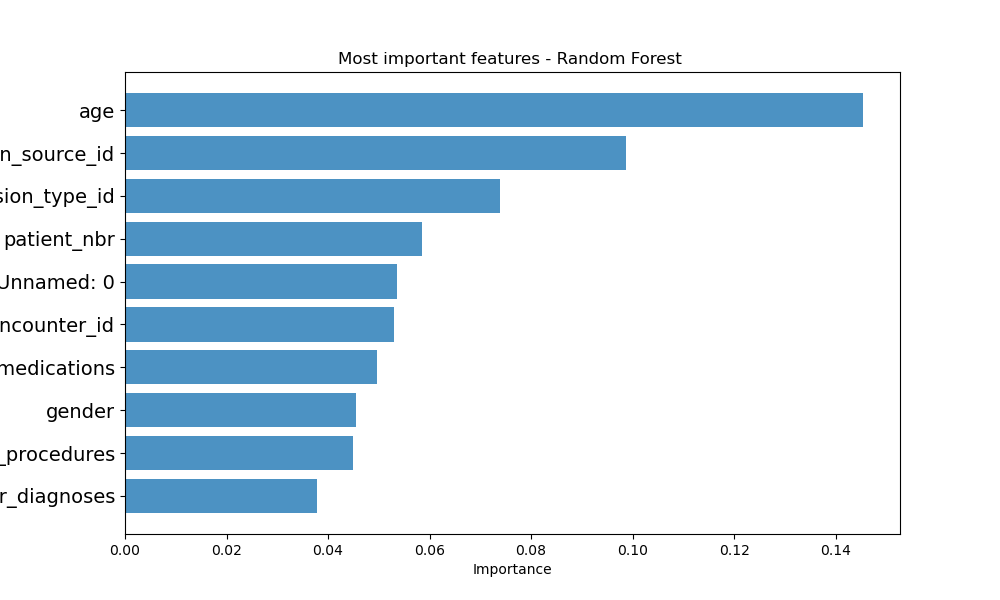

In [149]:
feature_names = X_train.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

<IPython.core.display.Javascript object>


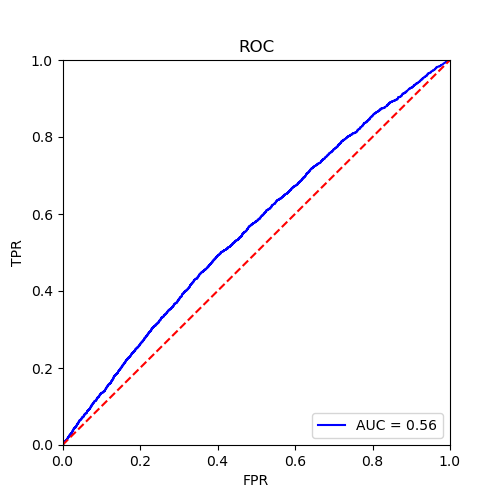

In [150]:
import matplotlib.pyplot as pltt
import sklearn.metrics as metrics

probs = rm.predict_proba(X_test)
predict = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, predict)
roc_auc = metrics.auc(fpr, tpr)

fig1 = plt.figure(figsize=(5,5))
fig1 = plt.title('ROC')
fig1 = plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
fig1 = plt.legend(loc = 'lower right')
fig1 = plt.plot([0, 1], [0, 1],'r--')
fig1 = plt.xlim([0, 1])
fig1 = plt.ylim([0, 1])
fig1 = plt.ylabel('TPR')
fig1 = plt.xlabel('FPR')

### RandomForestClassifier(Without upsampling)

In [151]:
X_train = train_df.drop(['readmitted'], axis = 1)
X_test = Ntest_df.drop(['readmitted'], axis = 1)
Y_test = Ntest_df['readmitted']
y_train = Y_train

In [152]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
Nx_train = scalar.fit_transform(X_train)
NX_test = scalar.transform(X_test)

In [153]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rfc.fit(Nx_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

In [154]:
rfc_prd = rfc.predict(NX_test)
pd.crosstab(pd.Series(Y_test, name = 'Actual'), pd.Series(rfc_prd, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,20097,101,20198
1,2624,13,2637
All,22721,114,22835


In [155]:
print("Accuracy is {0:.2f}".format(accuracy_score(Y_test, rfc_prd)))
print("Precision is {0:.2f}".format(precision_score(Y_test, rfc_prd)))
print("Recall is {0:.2f}".format(recall_score(Y_test, rfc_prd)))

accuracy_rm = accuracy_score(Y_test, rfc_prd)
precision_rm = precision_score(Y_test, rfc_prd)
recall_rm = recall_score(Y_test, rfc_prd) 

Accuracy is 0.88
Precision is 0.40
Recall is 0.02


In [156]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rm, Nx_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.88431237 0.88431237 0.88486524 0.88348307 0.88486524 0.8845888
 0.88417415 0.88362129 0.88388167 0.88346696]


In [157]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.8834669615703622, 0.884157116083365, 0.8848652384243262)

<IPython.core.display.Javascript object>


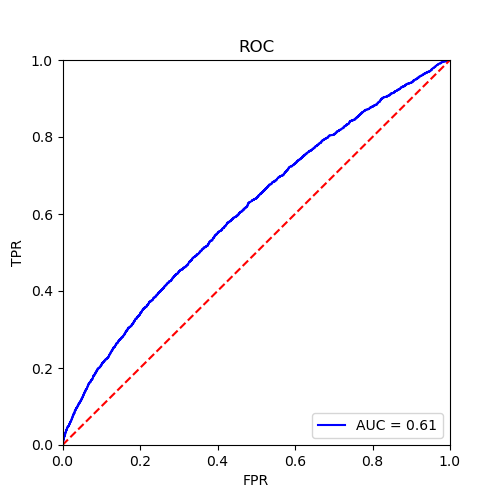

In [158]:
import matplotlib.pyplot as pltt
import sklearn.metrics as metrics

probs = rfc.predict_proba(NX_test)
predict = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, predict)
roc_auc = metrics.auc(fpr, tpr)

fig1 = plt.figure(figsize=(5,5))
fig1 = plt.title('ROC')
fig1 = plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
fig1 = plt.legend(loc = 'lower right')
fig1 = plt.plot([0, 1], [0, 1],'r--')
fig1 = plt.xlim([0, 1])
fig1 = plt.ylim([0, 1])
fig1 = plt.ylabel('TPR')
fig1 = plt.xlabel('FPR')

**RandomForestClassifier(Without up-sampling):**
we can see that Accuracy is 0.88, Precision is 0.38, Recall is 0.01, 
After perfoming K fold validation(max: 0.885) we can note that this model just about fits(0.88). 
**Model with up-sampling(RandomForestClassifier)**
we can see that Accuracy is 0.82, Precision is 0.15, Recall is 0.13,
After perfoming K fold validation(max: 0.871 and mean 0.91) we can note that this model fits perfectly.

**We choose the model with up sampling because the accuracy decreases but recall increases
the model without up-sampling overfits**

In [159]:
Acc_Rfc = 0.82
Pre_Rfc = 0.15
Rec_Rfc = 0.13

### Comaparing the models

#### Comparing the 3 seleted models on the bases of the 3 metric

<IPython.core.display.Javascript object>


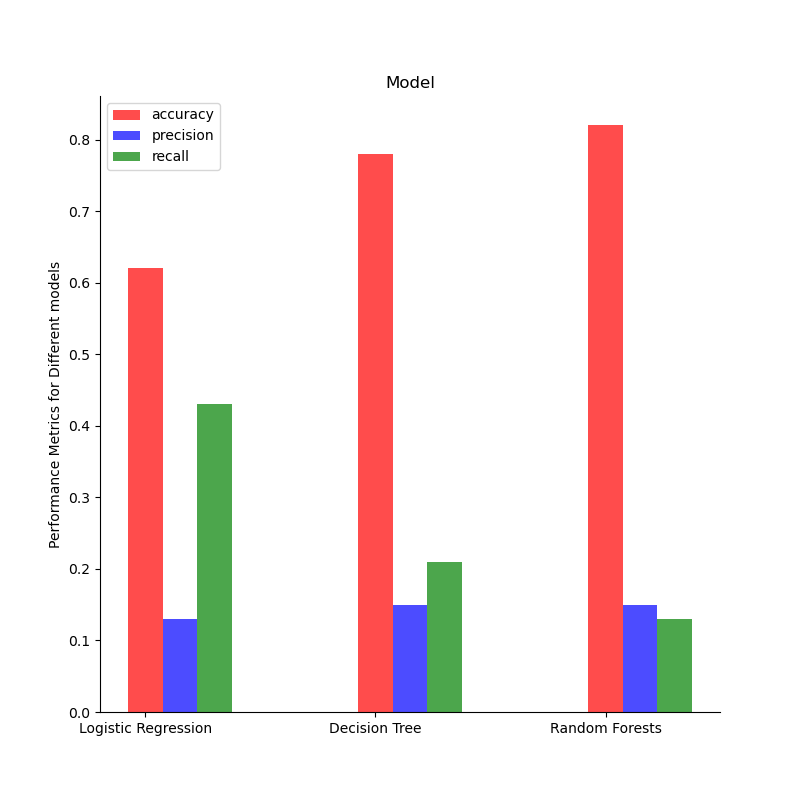

In [160]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [Acc_LR, Acc_DT, Acc_Rfc]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)
           

           
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [Pre_LR, Pre_DT, Pre_Rfc]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)



ax = plt.subplot(111)
models = ['Logistic Regression', 'Decision Tree', 'Random Forests' ]
values = [Rec_LR, Rec_DT, Rec_Rfc]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)



plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
    
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()

plt.show()           

**Conclusion:
On the bases of 3 given metrics Accuracy, Precision, Recall.
We will choose Random Forests model beacuse the problem statement asks to so accuratly identify the readmitted patients so accuracy will be an important factor.**